In [44]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [45]:
columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class_labels'] #column names

In [46]:
df = pd.read_csv("iris.data", names = columns) #read data

In [47]:
df.head() #display first 5 rows

,Sepal length,Sepal width,Petal length,Petal width,Class_labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [48]:
df.describe() #display summary statistics

,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


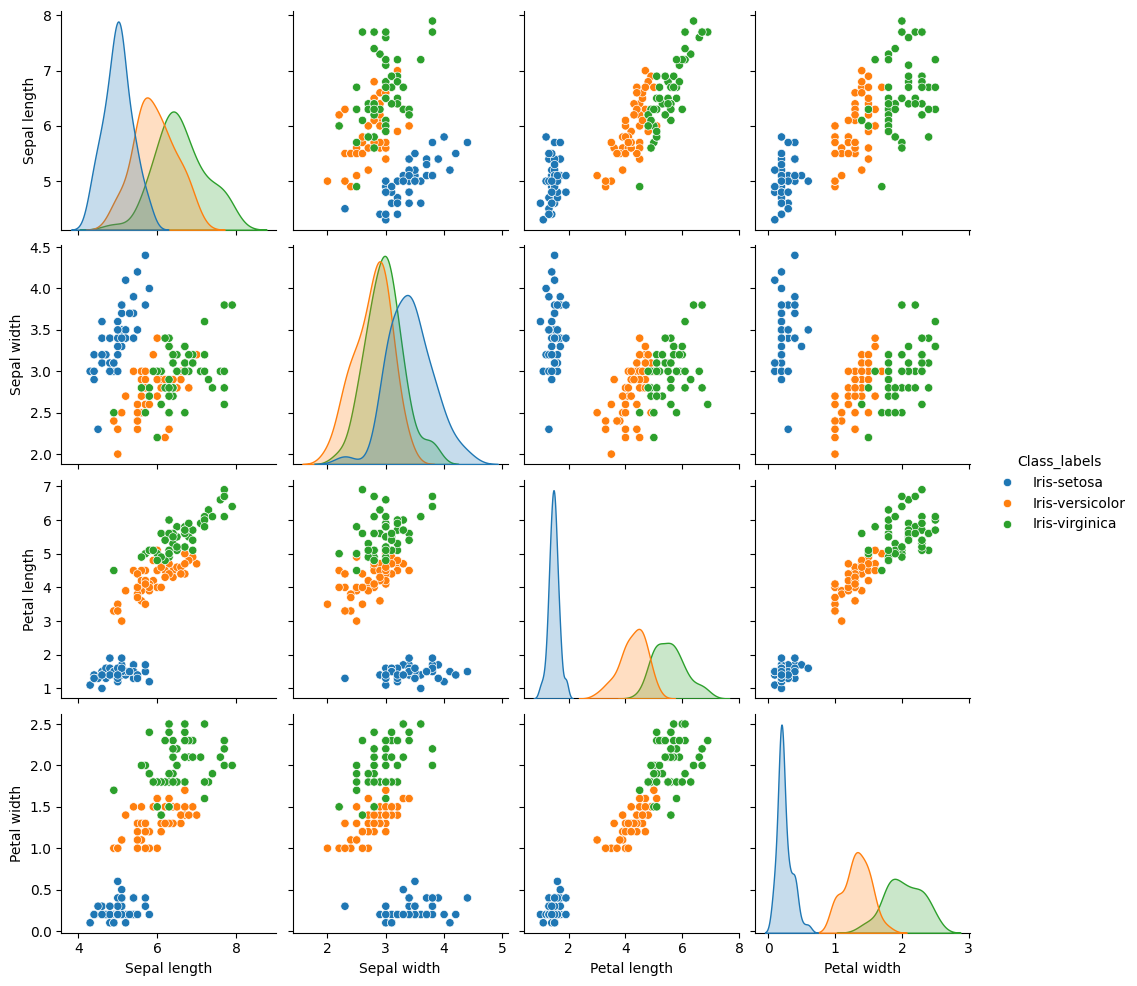

In [49]:
sns.pairplot(df, hue = 'Class_labels') #pairplot

In [50]:
data = df.values #convert to numpy array

In [51]:
X = data[:, 0:4] #features
Y = data[:, 4] #target

In [52]:
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1]) for j in (np.unique(Y))])
Y_Data_reshaped = Y_Data.reshape(4, 3)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
X_axis = np.arange(len(columns)-1)
width = 0.25

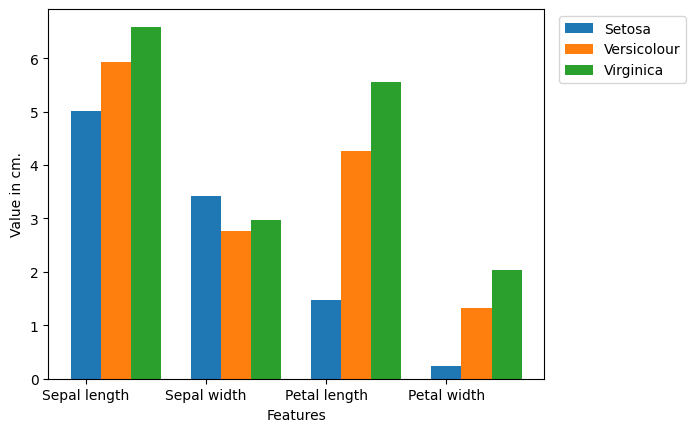

In [53]:
plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'Setosa')
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label = 'Versicolour')
plt.bar(X_axis+width*2, Y_Data_reshaped[2], width, label = 'Virginica')
plt.xticks(X_axis, columns[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

In [54]:
#training the model
from sklearn.model_selection import train_test_split

In [55]:
X_train , X_test , y_train, y_test = train_test_split(X, Y, test_size = 0.2, )

MODEL 1 : Support Vector Machine Algorithm

In [56]:
from sklearn.svm import SVC

model_svc = SVC()
model_svc.fit(X_train, y_train)

SVC()

In [57]:
#prediction
prediction1 = model_svc.predict(X_test)

In [58]:
#accuracy
from sklearn.metrics import accuracy_score
print("Accuracy of the model is: ", accuracy_score(y_test, prediction1)*100)

Accuracy of the model is:  100.0


MODEl 2 : Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [60]:
#prediction
preddiction2 = model_lr.predict(X_test)

In [61]:
#accuracy
print("Accuracy of the model is: ", accuracy_score(y_test, preddiction2)*100)

Accuracy of the model is:  96.66666666666667


MODEL 3 : Decison Tree Classifier

In [62]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [63]:
#prediction
prediction3 = model_dt.predict(X_test)

In [64]:
#accuracy
print("Accuracy of the model is: ", accuracy_score(y_test, prediction3)*100)

Accuracy of the model is:  96.66666666666667


Classification report

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction1))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [66]:
print(classification_report(y_test, preddiction2))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [67]:
print(classification_report(y_test, prediction3))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



Testing The Model

In [68]:
X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])
prediction_svc = model_svc.predict(X_new)
print(prediction_svc)

['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor']


In [69]:
prediction_lr = model_lr.predict(X_new)
print(prediction_lr)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [70]:
prediction_dt = model_dt.predict(X_new)
print(prediction_dt)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


save the model:

In [71]:
import pickle
with open('iris_model.pkl', 'wb') as f:
    pickle.dump(model_svc, f)

with open('iris_model.pkl', 'rb') as f:
    model = pickle.load(f)
model.predict(X_new)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor'], dtype=object)